In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('../input/pakistans-job-market/pakistan-available-job-dec-19-mar-21.csv')
df.shape

(6680, 9)

In [3]:
df.head()

,Job Name,label,Company Name,Job Type,Experience Required,Department,JD,City,Date Posted
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Premium Job,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,12-Mar-21
1,Full Time Senior Web Developer Jobs in Pakistan,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,12-Mar-21
2,Full Time Russian Speakers Jobs in Pakistan,Premium Job,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,12-Mar-21
3,Full Time Customer Support Specialist - Intern...,Premium Job,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,9-Mar-21
4,Full Time English Speaker - International Busi...,Premium Job,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,5-Mar-21


In [4]:
df.describe(include='all')

,Job Name,label,Company Name,Job Type,Experience Required,Department,JD,City,Date Posted
count,6680,1115,6017,6680,6680,6680,6680,6680,6680
unique,3838,3,2879,2,17,111,5043,86,443
top,Full Time Graphic Designer Job in Pakistan,Gallery Job,"ibex, Pakistan",Full Time Job,2 Years Job Exp.,IT Job,To generate quality leads that result in sales...,Lahore,23-Feb-21
freq,60,775,93,3821,1635,820,37,2046,134


In [5]:
df.isnull().sum()

Job Name                  0
label                  5565
Company Name            663
Job Type                  0
Experience Required       0
Department                0
JD                        0
City                      0
Date Posted               0
dtype: int64

# EDA

# Most Job Providing Cities

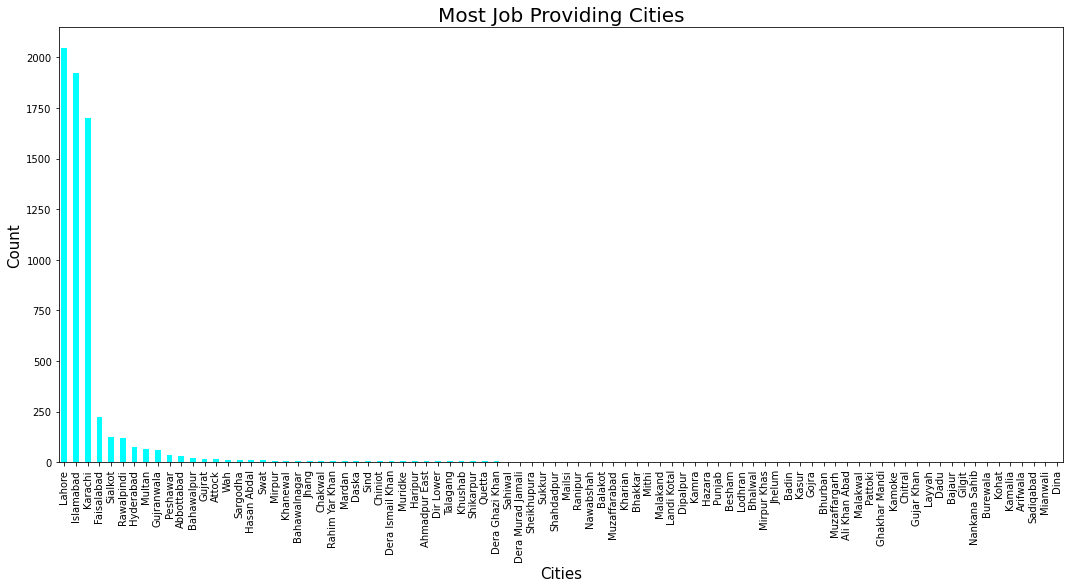

In [6]:
plt.rcParams['figure.figsize'] = (18,8)
df['City'].value_counts().sort_values(ascending = False).plot.bar(color = 'cyan')
plt.title("Most Job Providing Cities", fontsize = 20)
plt.xlabel('Cities', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

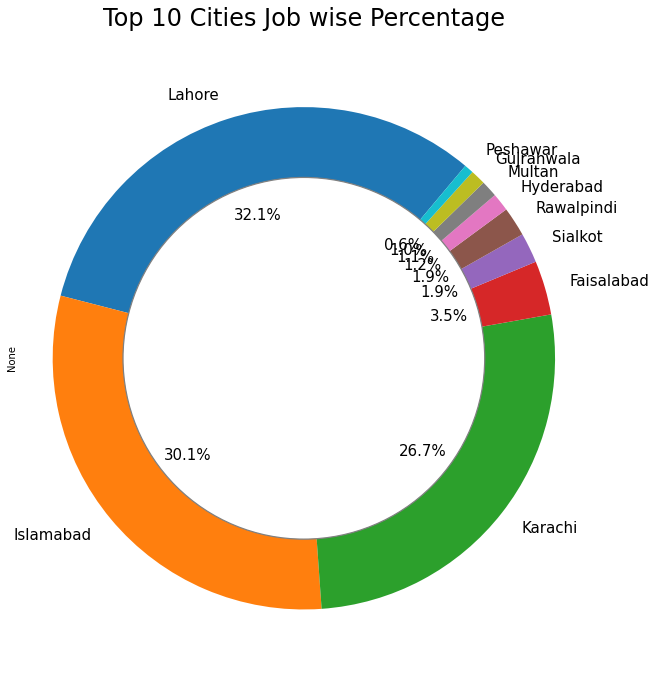

In [7]:
df.City.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(10,12),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Top 10 Cities Job wise Percentage",fontsize=24)

#https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

# Total Jobs Departments

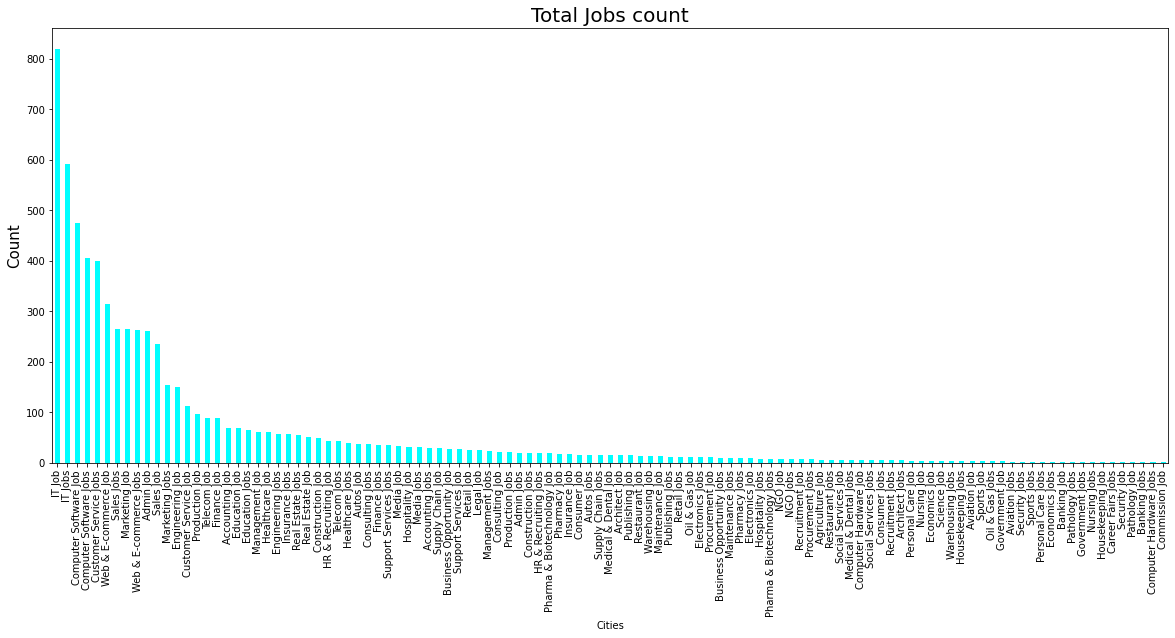

In [8]:
plt.rcParams['figure.figsize'] = (20,8)
df['Department'].value_counts().sort_values(ascending = False).plot.bar(color = 'cyan')
plt.title("Total Jobs count", fontsize = 20)
plt.xticks(rotation=90)
plt.xlabel('Cities', fontsize = 10)
plt.ylabel('Count', fontsize = 15)
plt.show()

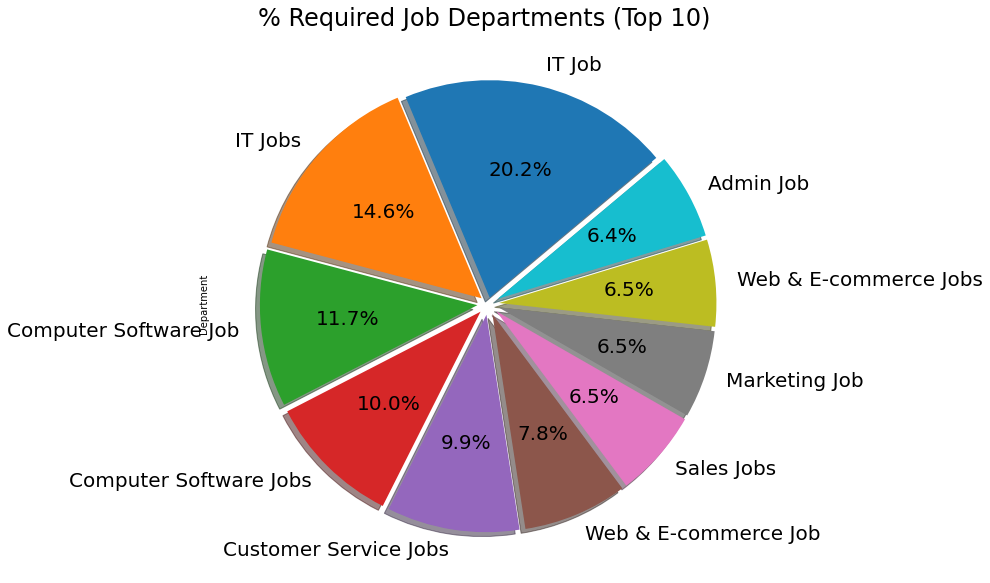

In [9]:
df["Department"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("% Required Job Departments (Top 10) ",fontsize=24)
plt.show()

# Required Experience

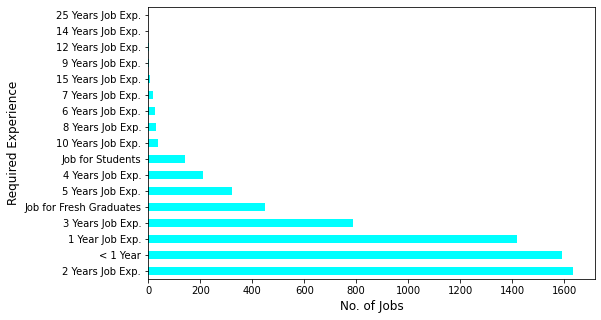

In [10]:
df["Experience Required"].value_counts()[:].plot.barh(figsize=(8,5),fontsize=10,color="cyan")
plt.xlabel("No. of Jobs",fontsize=12)
plt.ylabel("Required Experience",fontsize=12)
plt.show()

# Job Categories

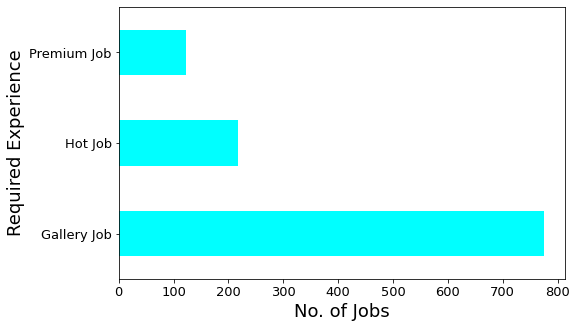

In [11]:
df["label"].value_counts()[:].plot.barh(figsize=(8,5),fontsize=13,color="cyan")
plt.xlabel("No. of Jobs",fontsize=18)
plt.ylabel("Required Experience",fontsize=18)
plt.show()

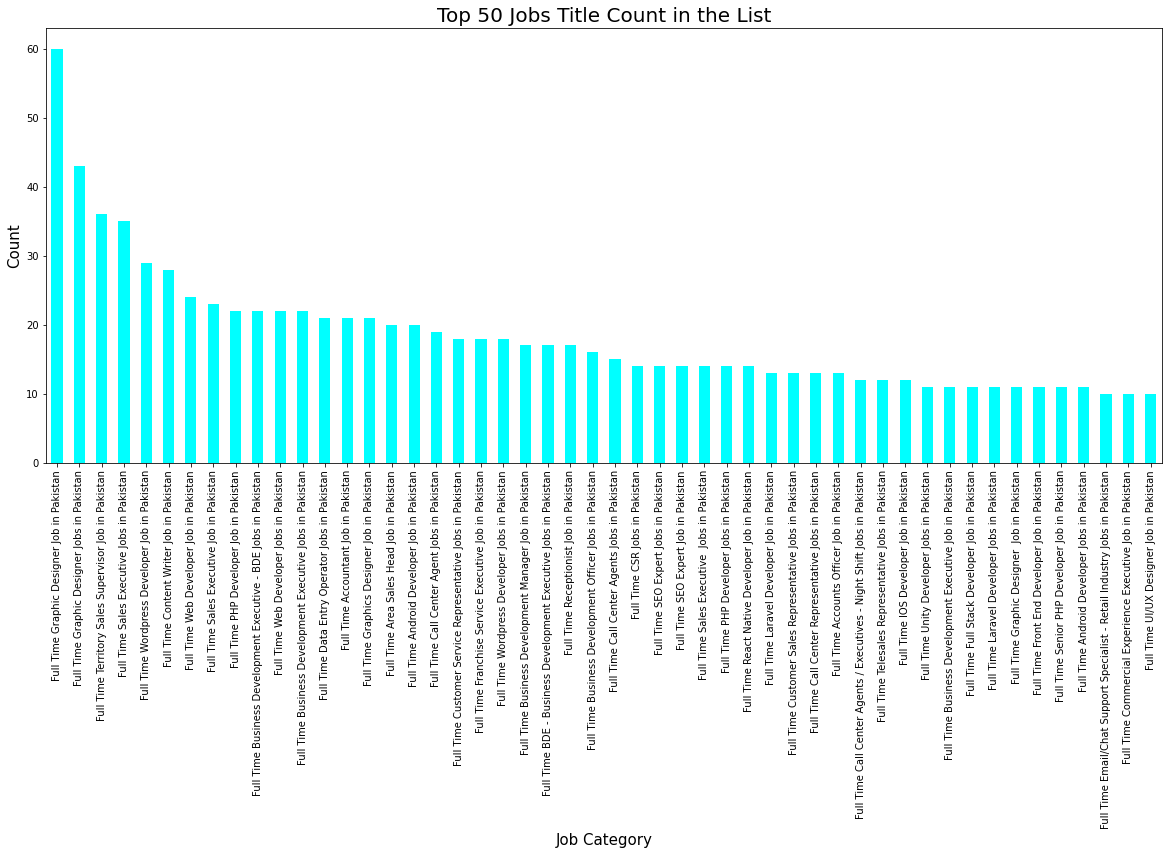

In [12]:
plt.rcParams['figure.figsize'] = (20,8)
df['Job Name'].value_counts().sort_values(ascending = False).head(50).plot.bar(color = 'cyan')
plt.title("Top 50 Jobs Title Count in the List", fontsize = 20)
plt.xlabel('Job Category', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

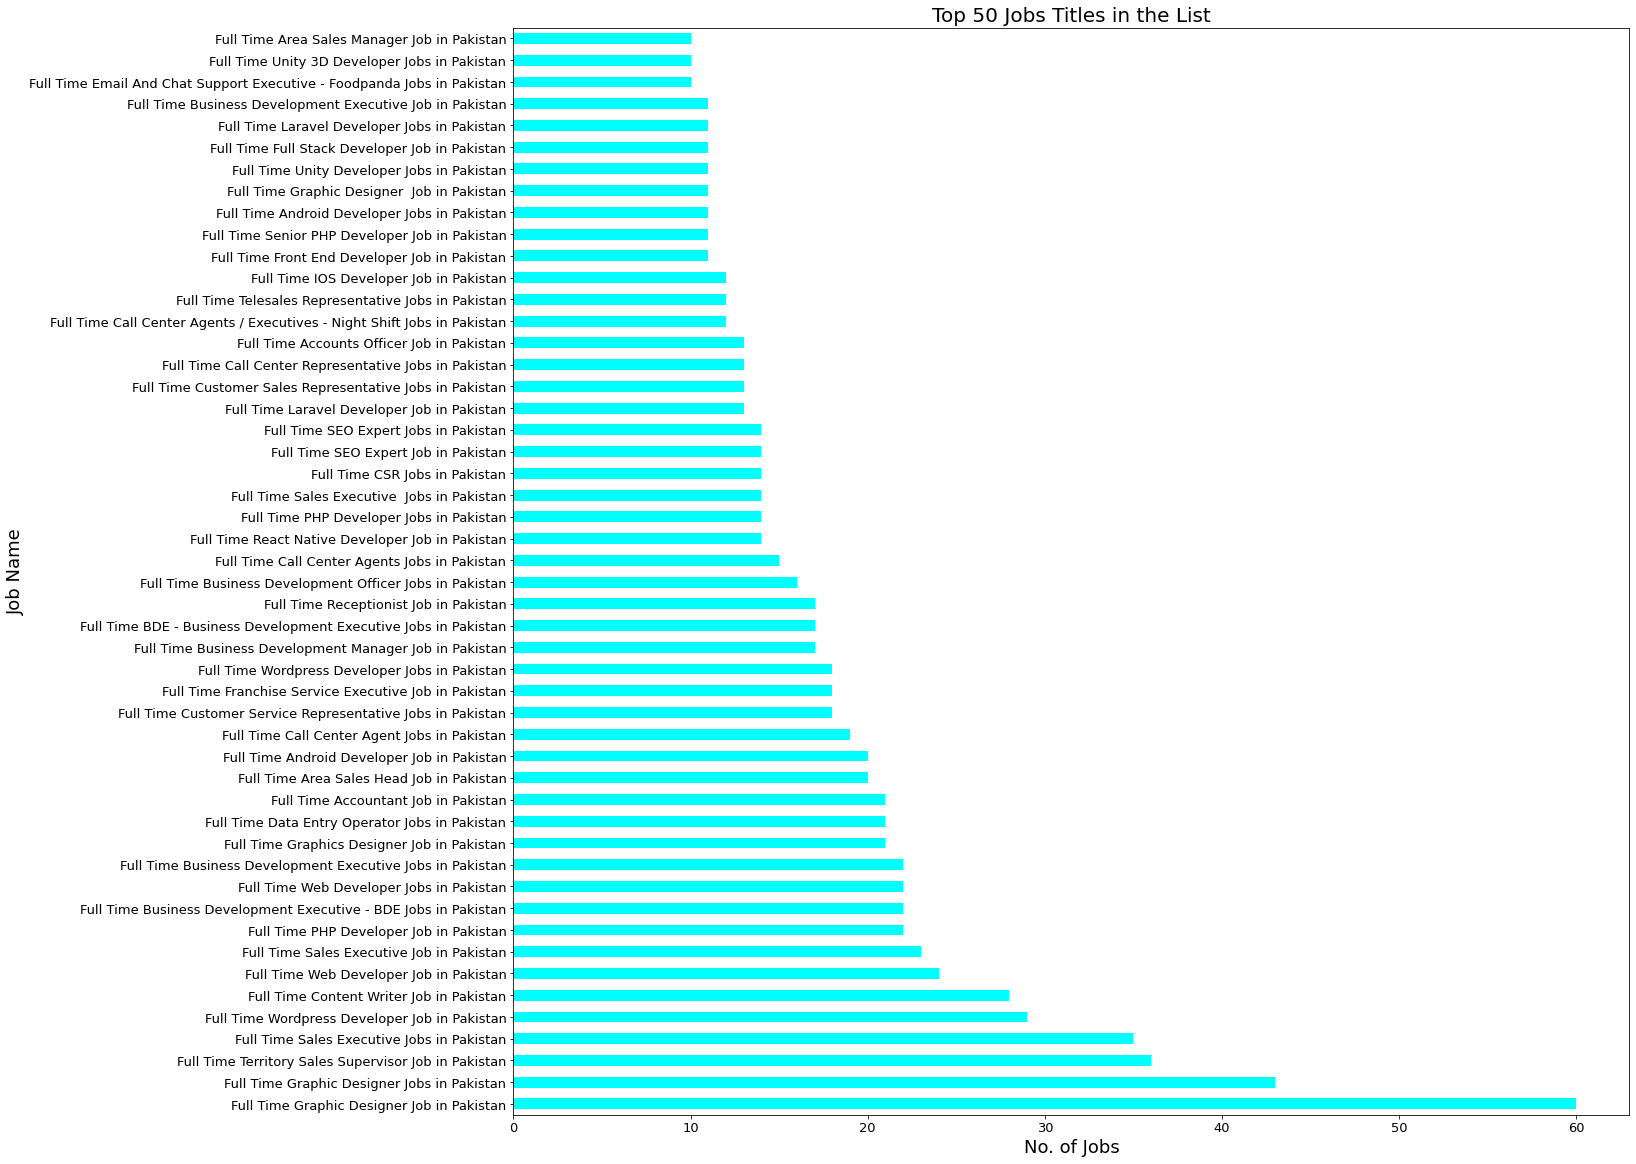

In [13]:
df["Job Name"].value_counts()[:50].plot.barh(figsize=(20,20),fontsize=13,color="cyan")
plt.xlabel("No. of Jobs",fontsize=18)
plt.title("Top 50 Jobs Titles in the List", fontsize = 20)
plt.ylabel("Job Name",fontsize=18)
plt.show()

# Word Clouds

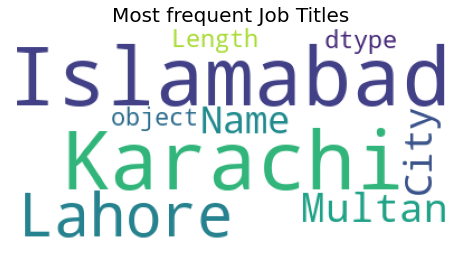

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df['City']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most frequent Job Titles', fontsize = 20)
plt.show()

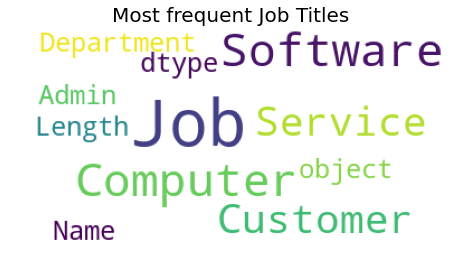

In [15]:
wordcloud = WordCloud(background_color = 'white').generate(str(df['Department']))
print(wordcloud)
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most frequent Job Titles', fontsize = 20)
plt.show()

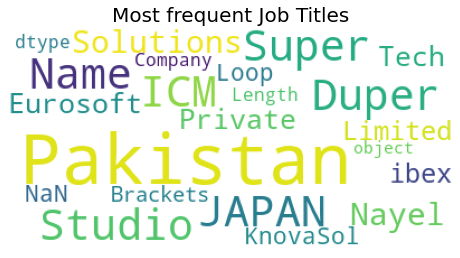

In [16]:
wordcloud = WordCloud(background_color = 'white').generate(str(df['Company Name']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most frequent Job Titles', fontsize = 20)
plt.show()